# Prediction Models

In machine learning, a prediction model, also known as a predictive model or a regression model, is a mathematical representation or algorithm that is trained on data to make predictions or estimates about unknown or future outcomes. It is a fundamental component of supervised learning, where the model learns patterns and relationships from labeled training data and then applies that knowledge to make predictions on new, unseen data.

The prediction model takes input features or variables and uses them to generate output predictions. The specific type of prediction model used depends on the problem at hand. For example, linear regression models are commonly used for predicting continuous numerical values, while classification models such as logistic regression, decision trees, or support vector machines are used for predicting discrete categorical values or class labels.




##Part 1 - Regression

## Linear Regression

Linear regression is a basic supervised learning algorithm that is widely used for making predictions. It is often taught in introductory statistics courses and is considered a fundamental technique in data analysis. Although it is straightforward and relatively simple compared to other machine learning algorithms, **linear regression remains valuable for predicting quantitative values such as home prices or ages**. Despite its simplicity, linear regression and its variations remain relevant and effective in practical applications.


##Problem 
##1.1 Fitting a line
Suppose you want to train a model that represents a linear relationship between the feature and target vector. You can use a linear regression (in scikit-learn, `LinearRegression`):

In [2]:
# Load libraries
from sklearn.linear_model import LinearRegression

#load california housing dataset from scikit
from sklearn.datasets import fetch_california_housing

#load dataset
california_housing = fetch_california_housing(as_frame=True)



###First, visualizing the data that we have:
Let's better visualize these features by plotting their histograms.

In [3]:
#let's take a look at the data description
#TODO

In [4]:
#show the dataset's info: the details the data types and if the dataset contains any missing value.
#TODO

We can see that:

the dataset contains 20,640 samples and 8 features

all features are numerical features encoded as floating number

there is no missing values.

In [71]:
# visualize the distribution of these features by plotting their histograms
import matplotlib.pyplot as plt

#TODO
#TODO

As you see in the output of the data info, we are provided with the longitude and latitude that carry geographical information. Let's take a look at this information. 

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

Please note that California's big cities: San Diego, Los Angeles, San Jose, or San Francisco, are located in the east coast!

We can perform random subsampling to reduce the number of data points for plotting, while still capturing the relevant characteristics.

In [7]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=200, replace=False
)

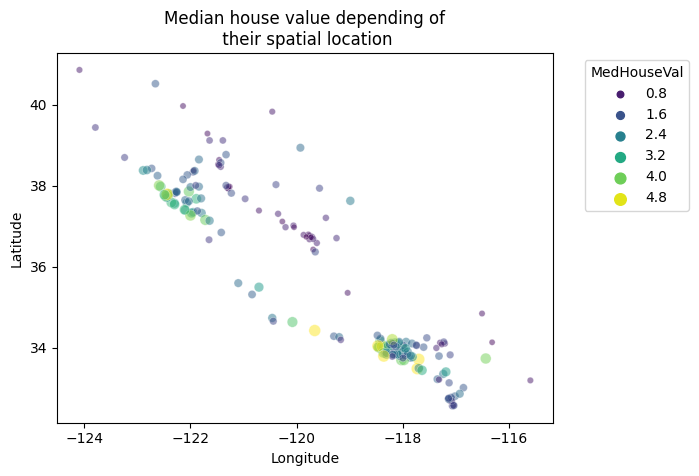

In [8]:
sns.scatterplot(
    data=california_housing.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

###Create input feature set and traget aka output set for fitting the regression:

In [9]:
# Create features
#TODO

In [73]:
# show features head information

#TODO


In [72]:
#the target contains the median of the house value for each district
# to see it show target head information

#TODO


In [12]:
# Create linear regression
#TODO

# Fit the linear regression
#TODO

In [13]:
# First value in the target vector multiplied by 1000
#TODO

4526.0

Using the `predict` method, we can predict a value for that house:

In [14]:
# Predict the target value of the first observation, multiplied by 1000
#TODO

4131.649827076742

Not bad! Our model was only off by $394.35!

##1.2 Reducing Features with Lasso Regression

Suppose you want to simplify your linear regression model by reducing the number of features To find this, you can use a lasso regression:

In [15]:
# import lasso regressor from scikit library
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [16]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create lasso regression with alpha value
regression = Lasso(alpha=0.5) 

# Fit the linear regression
model = regression.fit(features_standardized, target)

In [17]:
# First value in the target vector multiplied by 1000
#TODO

4526.0

In [18]:
# Predict the target value of the first observation, multiplied by 1000
#TODO

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


4516.07863009973

Wow! Look at the difference!

**Discussion**

One interesting characteristic of lasso regression’s penalty is that it can shrink the coefficients of a model to zero, effectively reducing the number of features in the model. For example, in our solution we set alpha to 0.5, if we adjust lasso’s α hyperparameter to 10, it produces a model that uses only 10 (for instance) of the most important features. This lets us reduce variance while improving the interpretability of our model (since fewer features is easier to explain).

##Part 2 - Classification Algorithms

### 2.1 Getting Dataset for classification tasks and some data visualization 

In [19]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
#load iris dataset for classification from scikit datasets library
iris = datasets.load_iris()


In [21]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

From left to right, Iris setosa (by Radomil, CC BY-SA 3.0), Iris versicolor (by Dlanglois, CC BY-SA 3.0), and Iris virginica (by Frank Mayfield, CC BY-SA 2.0). (Image was taken from tensorflow website)

In [23]:
features = iris.data
target = iris.target

**input features**

In [24]:
# show iris feature names

#TODO


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


There are 4 features in the iris dataset named Sepal, Petal, length, and width. Since the iris dataset contains four features, it is expected to have four columns in the feature matrix. We can confirm this by utilizing `shape` function.

In [25]:
# show size of feature matrix
#TODO

(150, 4)


**target data**

In [26]:
# show names of target/output in iris dataset
#TODO

['setosa' 'versicolor' 'virginica']


In [27]:
# show size of target
#TODO

(150,)


In [28]:
# print target data
#TODO

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]




iris species: 

0 = setosa

1 = versicolor

2 = virginica

Converting dataset into Dataframe for getting some helpful insights about iris dataset. To perform this we need pandas numpy libraries.

In [75]:
#convert iris dataset to a dataframe

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [77]:
#show head of the dataframe
#TODO


In [78]:
#show dataframe description
#TODO


In [79]:
#show dataframe info
#TODO

Check columns names of dataset:

In [80]:
#show dataframe keys
#TODO

###Visualize Iris data with Python's visualization tools from Pandas, Matplotlib and Seaborn Libraries

In [34]:
df.Species.value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [81]:
# plot iris features histogram
#TODO


In [82]:
# plot data density
#TODO


### Visualize the correlations among feautres

In [ ]:
plt.figure(figsize=(7,4)) 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(df.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2') 

#show plot
plt.show()

Based on the depicted figure, it is evident that Sepal Length and Sepal Width have weak correlations, while Petal Width and Petal Length exhibit strong correlations. This implies that the identification of species can be achieved more accurately using the Petal measurements compared to the Sepal measurements.

##2.2 Tree-based learning algorithms

Tree-based learning algorithms are a widely used and diverse group of non-parametric supervised methods that are effective for both classification and regression tasks. They are characterized by their ability to create decision trees, which are hierarchical structures that make predictions based on a sequence of binary splits. These algorithms are popular due to their flexibility and ability to capture complex relationships in the data without relying on explicit assumptions about the underlying distribution.

In this section we will cover how to train, handle, adjust, visualize, and evaluate a number of tree-based models for classification problems.


##Problem 
##2.2.1 Training a Decision Tree Classifier
Suppose you want to train a classifier using a decision tree. You can use scikit-learn’s DecisionTreeClassifier:

In [38]:
#import decision tree classifier from scikit
#TODO

In [39]:
# Create decision tree classifier object with random state=0
#TODO

In [40]:
# Train model
#TODO

**Discussion**

Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default DecisionTreeClassifier uses Gini impurity:

*G(t) =1 − ∑pi^2*

where G(t) is the Gini impurity at node t and pi is the proportion of observations of class c at node t. This process of finding the decision rules that create splits to increase impurity is repeated recursively until all leaf nodes are pure (i.e., contain only one class) or some arbitrary cut-off is reached.
In scikit-learn, DecisionTreeClassifier operates like other learning methods; after the model is trained using fit we can use the model to predict the class of an observation:

In [41]:
# Make new observation
observation = [[ 5, 4, 3, 2]] 

# Predict observation's class
model.predict(observation)

array([1])

We can also see the predicted class probabilities of the observation:

In [42]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

Let's Visualize our Decision Tree Model

In [43]:
# Load libraries
import pydotplus
from IPython.display import Image
from sklearn import tree

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                    out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

# Show graph
Image(graph.create_png())


**Discussion**

One of the key advantages of decision tree classifiers is their interpretability, as the entire trained model can be visualized. This makes decision trees one of the most comprehensible models in the field of machine learning. In our approach, we exported the trained model in DOT format, which is a graph description language, and utilized it to generate the graph visualization.

By examining the root node of the decision tree, we can observe the decision rule: if the petal width is less than or equal to 0.8, the left branch is followed; otherwise, the right branch is taken. Additionally, the graph displays the Gini impurity index (0.667), the total number of observations (150), the distribution of observations across each class ([50, 50, 50]), and the predicted class if the decision-making process ended at that node (setosa).

It is noteworthy that the learner found that a single decision rule (petal width (cm) <= 0.8) was sufficient to accurately identify all observations belonging to the setosa class at that node. Moreover, by incorporating one more decision rule with the same feature (petal width (cm) <= 1.75), the decision tree achieves correct classification of 144 out of 150 observations. This highlights the significant importance of the petal width feature in the decision-making process.

##2.2.2 Training a Random Forest Classifier

In this section, you want to train a classification model using a “forest” of randomized decision trees. TYou can perform this tasks by using scikit-learn’s RandomForestClassifier:

In [45]:
# Load libraries
#TODO

In [46]:
 # Create random forest classifier object
#TODO

In [47]:
# Train model
#TODO

In [48]:
 # Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
#TODO

array([1])

In [49]:
# View predicted class probabilities for the three classes
#TODO

array([[0.028, 0.571, 0.401]])

**Discusion**

Overfitting is a common issue with decision trees, where they become overly tailored to the training data. To address this problem, a popular ensemble learning technique called random forest is often used. 
In a random forest, multiple decision trees are trained, but each tree is trained on a different random sample of observations (selected with replacement) and considers only a subset of features at each node to determine the best split. The predictions of these randomized decision trees are then combined through voting to determine the final predicted class.

However, the RandomForestClassifier, being a collection of decision trees rather than a single tree, has certain parameters that are unique to random forests or particularly important.

` max_features`: determines the maximum number of features to consider at each node  
 
 `random_state`: controls randomness of the sample and not specific to random forest classifier

 `n_estimators` : determines the number of decision trees to include in the random forest
 
  `n_jobs`: it is often beneficial to utilize all available cores by setting n_jobs=-1, as we are effectively training multiple decision tree models.

###Identifying Important Features in Random Forests

To find which features are most important in a random forest model.

In [50]:
# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

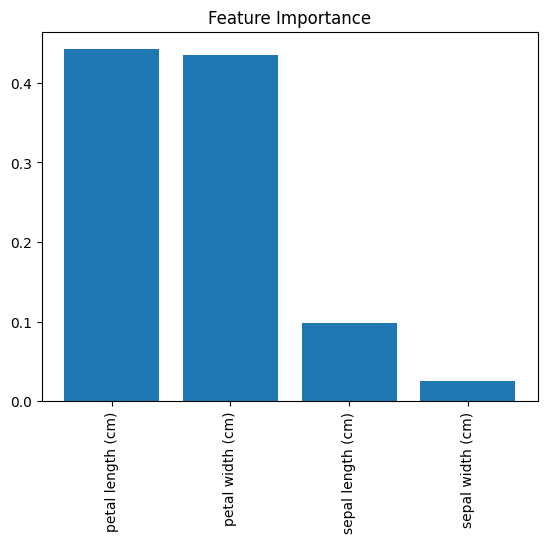

In [51]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance") 

# Add bars
plt.bar(range(features.shape[1]), importances[indices]) 

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90) 

# Show plot
plt.show()

In scikit-learn, classification and regression decision trees and random forests can report the relative importance of each feature using the `feature_importances_` method:

In [52]:
# View feature importances
model.feature_importances_

array([0.09792816, 0.02518223, 0.4422498 , 0.43463981])

###Evaluating Random Forests with Out-of-Bag Errors

If you want to evaluate a random forest model without using cross-validation, calculate the model’s out-of-bag score.

In random forests, each decision tree is trained using a subset of observations created through bootstrapping. This implies that for every tree, there is a distinct subset of observations that are not used for training that particular tree. These excluded observations are referred to as out-of-bag (OOB) observations. We can utilize these OOB observations as a test set to assess the performance of our random forest.

In scikit-learn, we can OOB scores of a random forest by setting `oob_score=True` in the random forest object (i.e., RandomForestClassifier). The score can be retrieved using *oob_score_*.

In [53]:
# Create random tree classifier object
randomforest = RandomForestClassifier(
        random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# Train model
#TODO

# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334

##2.3 K-Nearest Neighbors Classifier

The K-Nearest Neighbors classifier (KNN) is one of the simplest yet most commonly used classifiers in supervised machine learning. KNN is often considered a lazy learner; it doesn’t technically train a model to make predictions. Instead an observation is predicted to be the class of that of the largest proportion of the k nearest observations. For example, if an observation with an unknown class is surrounded by an observation of class 1, then the observation is classified as class 1. In this chapter we will explore how to use scikit-learn to create and use a KNN classifier.

###Creating a K-Nearest Neighbor Classifier



In [54]:
 # Load KNN classifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

In [55]:
# Load data 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [56]:
# Create standardizer
standardizer = StandardScaler() 

# Standardize features
X_std = standardizer.fit_transform(X)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

In [57]:
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75], [1, 1, 1, 1]]

# Predict the class of two observations
#TODO

array([1, 2])

In [58]:
# View probability each observation is one of three classes
#TODO

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

**Discussion**

In KNN, given an observation, xu, with an unknown target class, the algorithm first identifies the k closest observations (sometimes called x(i)’s neighborhood) based on some distance metric (e.g., Euclidean distance), then these k observations “vote” based on their class, and the class that wins the vote is x(i)’s predicted class. 

##2.3 Support Vector Machines Classifier

Support vector machines (SVM) rely on the concept of hyperplanes to classify data. A hyperplane is a subspace that exists in an n-dimensional space, where n represents the number of dimensions. In simpler terms, it can be visualized as a line in a two-dimensional space or a flat surface in a three-dimensional space. The purpose of a hyperplane in SVM is to maximize the margin between the classes present in the training data. In a two-dimensional scenario with two classes, the hyperplane can be imagined as the widest band or line that separates the two classes.

To train a support vector classifier (SVC) to find the hyperplane that maximizes the margins between the classes:

In [59]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [60]:
# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [61]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [62]:
# Create support vector classifier
svc = LinearSVC(C=1.0) 

# Train model
#TODO

**Discussion**

scikit-learn’s LinearSVC implements a simple SVC. To get an intuition behind what an SVC is doing, let us plot out the data and hyperplane. While SVCs work well in high dimensions, in our solution we only loaded two features and took a subset of observations so that the data contains only two classes. This will let us visualize the model. Recall that SVC attempts to find the hyperplane—a line when we only have two dimensions—with the maximum margin between the classes. In the following code we plot the two classes on a two-dimensional space, then draw the hyperplane:

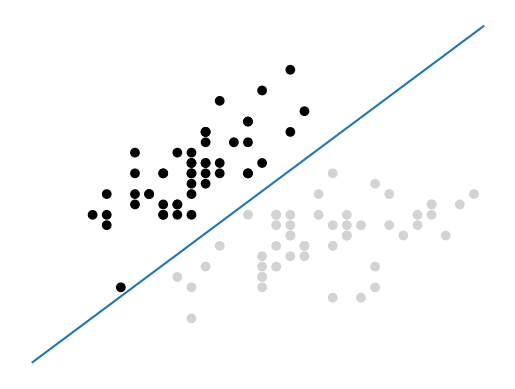

In [63]:
# Load library
from matplotlib import pyplot as plt

# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target] 
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a=-w[0]/w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In this graphical representation, the data points belonging to class 0 are depicted as black, while those belonging to class 1 are shown as light gray. The hyperplane serves as the boundary that determines the classification of new observations. More precisely, any observation positioned above the line will be classified as class 0, whereas any observation below the line will be classified as class 1. This can be demonstrated by introducing a new observation in the top-left corner of the graph, indicating that it should be predicted as class 0.

In [64]:
# Create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
#TODO

array([0])

There are several important points to consider regarding Support Vector Classifiers (SVCs). Firstly, in our illustration, we focused on a binary example with only two classes. However, SVCs are also capable of effectively handling multiple classes. Secondly, as demonstrated in our visualization, the hyperplane of an SVC is inherently linear and not curved. This was acceptable in our example since the data was linearly separable, implying the existence of a hyperplane that could accurately separate the two classes. However, it is crucial to acknowledge that in real-world scenarios, linear separability is seldom encountered.

##2.4 Naive Bayes Classifier

The most common type of naive Bayes classifier is the Gaussian naive Bayes. 

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [67]:
# Create Gaussian Naive Bayes object
classifer = GaussianNB() 

# Train model
#TODO

In scikit-learn, we train a Gaussian naive Bayes like any other model using fit, and in turn can then make predictions about the class of an observation:

In [68]:
# Create new observation
new_observation = [[ 4, 4, 4, 0.4]] 

# Predict class
#TODO

array([1])

In [69]:
classifer.predict_proba(new_observation)

array([[1.34715602e-38, 9.99949727e-01, 5.02727760e-05]])

If you are intersted in visualizing the KNN model foloow the [Sample usage of Nearest Neighbors classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html), from scikit learn website. It will plot the decision boundaries for each class.